Abalone dataset from the UCI ML Respository \
dataset details : http://archive.ics.uci.edu/ml/datasets/Abalone \
Kaggle Link : https://www.kaggle.com/datasets/ryanholbrook/dl-course-data?resource=download

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
data = pd.read_csv("abalone.csv")

### Dataset Exploration

In [5]:
data.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data.columns

Index(['Type', 'LongestShell', 'Diameter', 'Height', 'WholeWeight',
       'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')

In [10]:
data.isnull().sum(axis=0)

Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

##### Tf!! I wasn't expecting a dataset to have no null values !!

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   object 
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [12]:
data['Type'].unique()

array(['M', 'F', 'I'], dtype=object)

In [13]:
data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

So, we will do a a binary classification problem whether a abalone is infant or not. \
Infant abalones can be harvested, so we can describe this as a real-life problem where we have to determine whether an abalone is ready to be harvested or not..

### Data Processing

In [16]:
data_processed = pd.get_dummies(data, columns=['Type'], drop_first = True)

In [18]:
data_processed = data_processed.drop(columns=["Type_M"])

In [19]:
data_processed.head()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Type_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [20]:
#So, the number of Infant abalones are 1342
data_processed['Type_I'].value_counts()[1]

1342

##### as we will predict Type_I, we will drop that column 

In [24]:
y = data_processed['Type_I']
y

0       0
1       0
2       0
3       0
4       1
       ..
4172    0
4173    0
4174    0
4175    0
4176    0
Name: Type_I, Length: 4177, dtype: uint8

In [28]:
data_processed.head()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Train-test split : 

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [92]:
X = data_processed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 515)

##### Checking correlation among features

In [93]:
X_train.corr()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
LongestShell,1.000000,0.986304,0.889075,0.924663,0.897557,0.902196,0.896112,0.551652
Diameter,0.986304,1.000000,0.894767,0.924385,0.891943,0.897871,0.904189,0.570303
Height,0.889075,0.894767,1.000000,0.881605,0.829801,0.858467,0.883934,0.601760
WholeWeight,0.924663,0.924385,0.881605,1.000000,0.969791,0.966131,0.955726,0.536939
ShuckedWeight,0.897557,0.891943,0.829801,0.969791,1.000000,0.930780,0.881567,0.417414
VisceraWeight,0.902196,0.897871,0.858467,0.966131,0.930780,1.000000,0.907792,0.499060
ShellWeight,0.896112,0.904189,0.883934,0.955726,0.881567,0.907792,1.000000,0.625661
Rings,0.551652,0.570303,0.601760,0.536939,0.417414,0.499060,0.625661,1.000000


<AxesSubplot:>

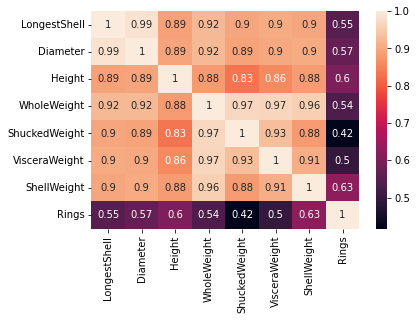

In [71]:
#viewing the heatmap
sns.heatmap(X_train.corr(), annot = True)

##### We have a lot of highly correlated features, so we will drop one feature and check the accuracy with k-fold cross validation

In [72]:
max_corr_features = ["LongestShell", "Diameter", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight"]

In [73]:
data_dropped = {}

In [74]:
for i in range(len(max_corr_features)):
    data_dropped["data_dropped_" + str(i+1)] = X_train.drop(columns = [max_corr_features[i]])
len(data_dropped) == len(max_corr_features)

True

In [75]:
from sklearn.model_selection import cross_validate
def cross_validation(model, X, y, cv = 10):
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator = model, X = X, y = y, cv = cv, scoring = scoring, return_train_score = True)
    return {
        "Mean training accuracy" : results['train_accuracy'].mean(),
        "Mean training Precision" : results['train_precision'].mean(),
        "Mean training recall" : results['train_recall'].mean(),
        "Mean training F1 Score" : results['train_f1'].mean(),
        "Mean Validation accuracy" : results['test_accuracy'].mean(),
        "Mean Validation Precision" : results['test_precision'].mean(),
        "Mean Validation recall" : results['test_recall'].mean(),
        "Mean Validation F1 Score" : results['test_f1'].mean()
    }

In [89]:
knn = KNeighborsClassifier(n_neighbors = 3)

### Feature Scaling and Cross Validating the training data

In [90]:
results = {}
for i in data_dropped:
    X = data_dropped[i]
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(X)
    results[i] = cross_validation(knn, X_norm, y_train, 10)

In [91]:
results

{'data_dropped_1': {'Mean training accuracy': 0.8850976906623511,
  'Mean training Precision': 0.8278468026847443,
  'Mean training recall': 0.8053459119496855,
  'Mean training F1 Score': 0.8164293533228107,
  'Mean Validation accuracy': 0.7979649655912057,
  'Mean Validation Precision': 0.6922603451841914,
  'Mean Validation recall': 0.6575471698113208,
  'Mean Validation F1 Score': 0.6731806977632238},
 'data_dropped_2': {'Mean training accuracy': 0.8833018034433294,
  'Mean training Precision': 0.8261243689332046,
  'Mean training recall': 0.800733752620545,
  'Mean training F1 Score': 0.8132160024281381,
  'Mean Validation accuracy': 0.8090347662883189,
  'Mean Validation Precision': 0.7069034196527213,
  'Mean Validation recall': 0.6858490566037736,
  'Mean Validation F1 Score': 0.6951453459390251},
 'data_dropped_3': {'Mean training accuracy': 0.8840001739122354,
  'Mean training Precision': 0.8286760843253396,
  'Mean training recall': 0.79979035639413,
  'Mean training F1 Scor

##### Since, data_dropped_4 has a mean training accuracy of 0.889 and mean validation accuracy of 0.813, we will drop "ShuckedWeight" from the dataframe to decrease multicorrelation

In [94]:
X_train, X_test = X_train.drop(columns = ["ShuckedWeight"]), X_test.drop(columns = ["ShuckedWeight"])

### Finally, training and testing the model

In [95]:
# Normalizing 
scaler = MinMaxScaler()
X_train_norm, X_test_norm = scaler.fit_transform(X_train), scaler.fit_transform(X_test) 

In [96]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
y_pred = knn.predict(X_test_norm)
print(y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 

#### So, we get a 75% accuracy !! 😢